# Predicting Bike Rentals

---
## Introduction:

In this project we are going to use a dataset full 17 380 rows conserning the number of bike that have been rent depending on differents varibales like weather, wind, temperature...

For that purpose we are going to try different models and evaluate which one give us the best predictions

---
## The dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = (13, 8)
plt.style.use('fivethirtyeight')

In [3]:
bike_rentals = pd.read_csv('bike_rental_hour.csv')

In [4]:
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
bike_rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


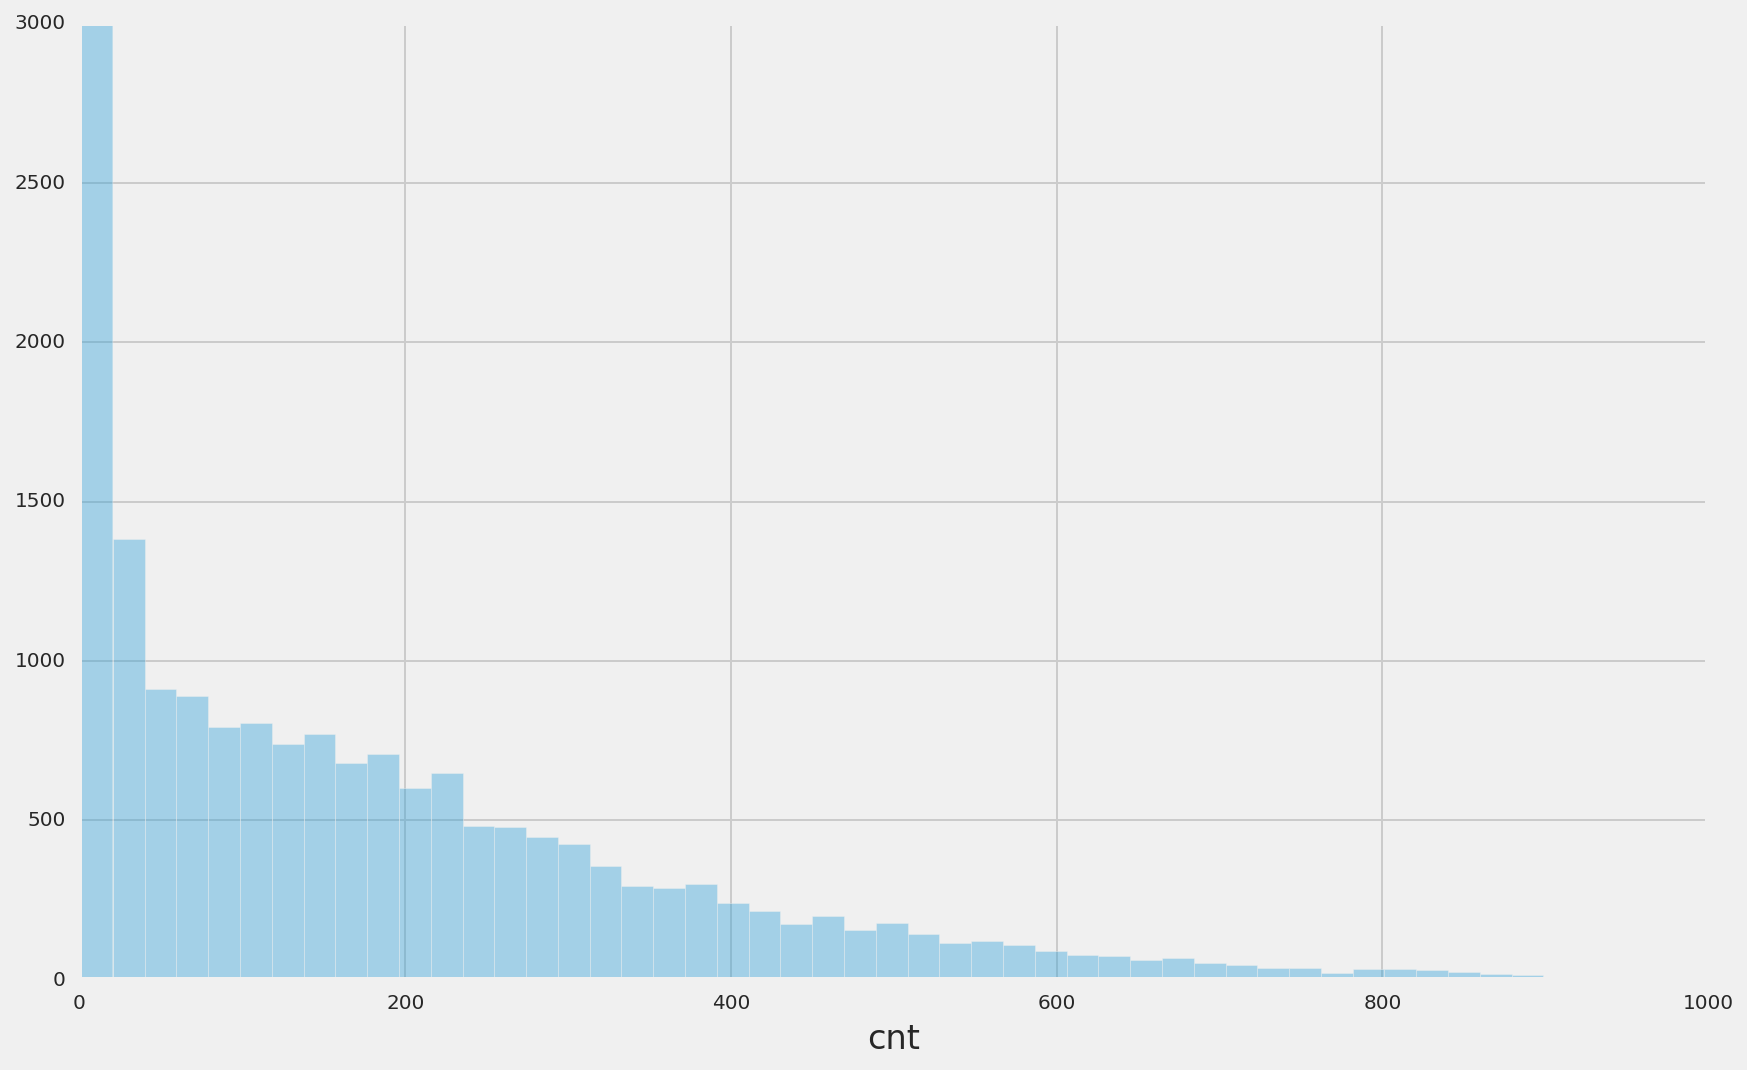

In [6]:
sns.distplot(bike_rentals['cnt'], kde = False)

We can see that the distribution is right skewed. More precisely most of the hours there are between 0 and 200 bikes that are rented

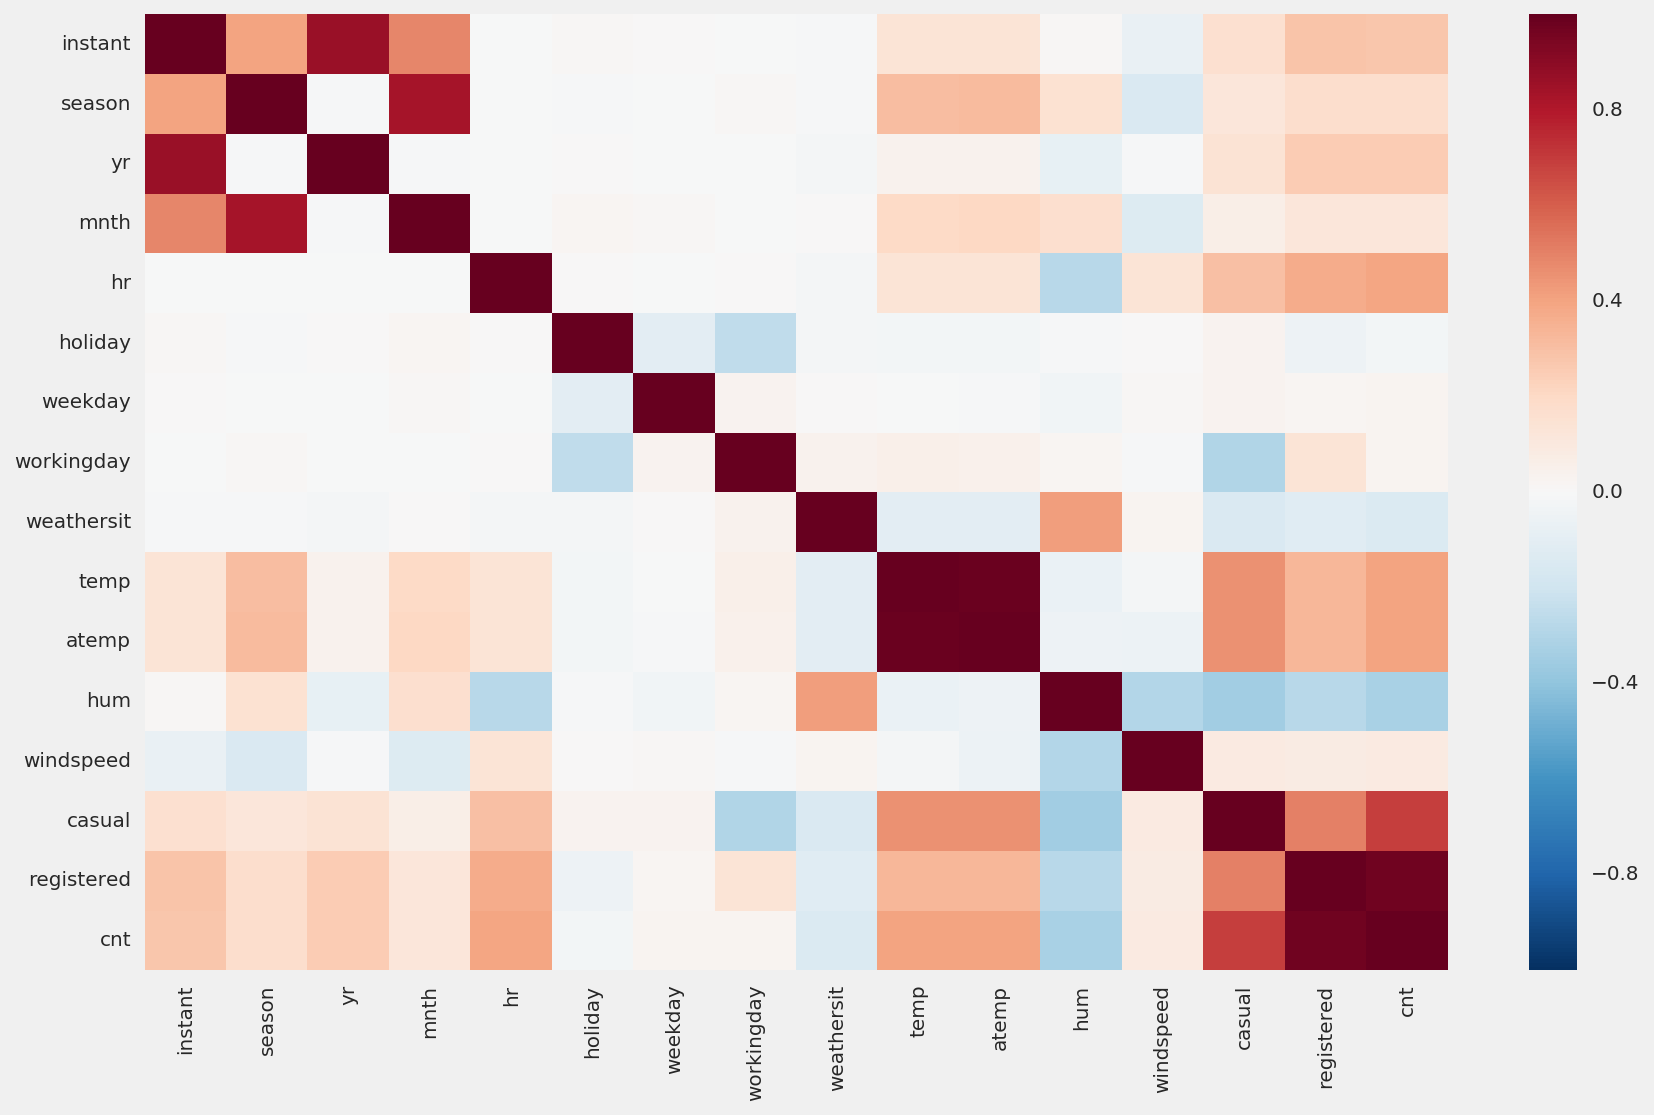

In [7]:
sns.heatmap(data = bike_rentals.corr())

---
## Features modifications

In [8]:
def assign_label(hour):
    if hour >= 6 and hour < 12:
        return 1
    elif hour >= 12 and hour < 18:
        return 2
    elif hour >= 18 and hour < 24:
        return 3
    else:
        return 4

In [9]:
bike_rentals['time_label'] = bike_rentals['hr'].apply(assign_label)

---
## Error metric

The mean squared error metric makes the most sense to evaluate our error. MSE works on continuous numeric data, which fits our data quite well.

In [10]:
train = bike_rentals.sample(frac = 0.8)

In [11]:
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]

---
## Linear regression

In [12]:
columns = train.columns.drop(['cnt','casual','dteday','registered', 'weekday', 'holiday', 'workingday'])

In [13]:
lr = LinearRegression()

In [14]:
lr.fit(train[columns], train['cnt'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
predictions = lr.predict(test[columns])

In [16]:
error_mesurement_linear_regression = mean_squared_error(test['cnt'], predictions)
print(error_mesurement_linear_regression)

16766.91983213704


The error is really high which indicate us that the model that we used isn't the best one to solve our problem

---
## Decision Tree

In [17]:
dt = DecisionTreeRegressor(max_depth = 10, min_samples_leaf = 5)

In [18]:
dt.fit(train[columns], train['cnt'])

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [19]:
predictions_decision_tree = dt.predict(test[columns])

In [20]:
error_mesurement_decision_tree = mean_squared_error(test['cnt'], predictions_decision_tree)
print(error_mesurement_decision_tree)

7815.788687651744


By using the decision tree regressor we can see that we reduced the mse a lot. At the same time by twiking the parameters we can see that we can reduce the mse even more

---
## Random Forest

In [21]:
rf = RandomForestRegressor(min_samples_leaf = 5, max_depth = 10)

In [22]:
rf.fit(train[columns], train['cnt'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [23]:
predictions_random_forest = rf.predict(test[columns])

In [24]:
error_mesurement_random_forest = mean_squared_error(test['cnt'], predictions_random_forest)
print(error_mesurement_random_forest)

7219.921491416866


By using the random forest model we reduced the error again. This model help use reduce the sensibility to noise and overfitting

In [25]:
d = {'Real Values': test['cnt'], 'Predictions': predictions_random_forest}
comparison = pd.DataFrame(data = d)

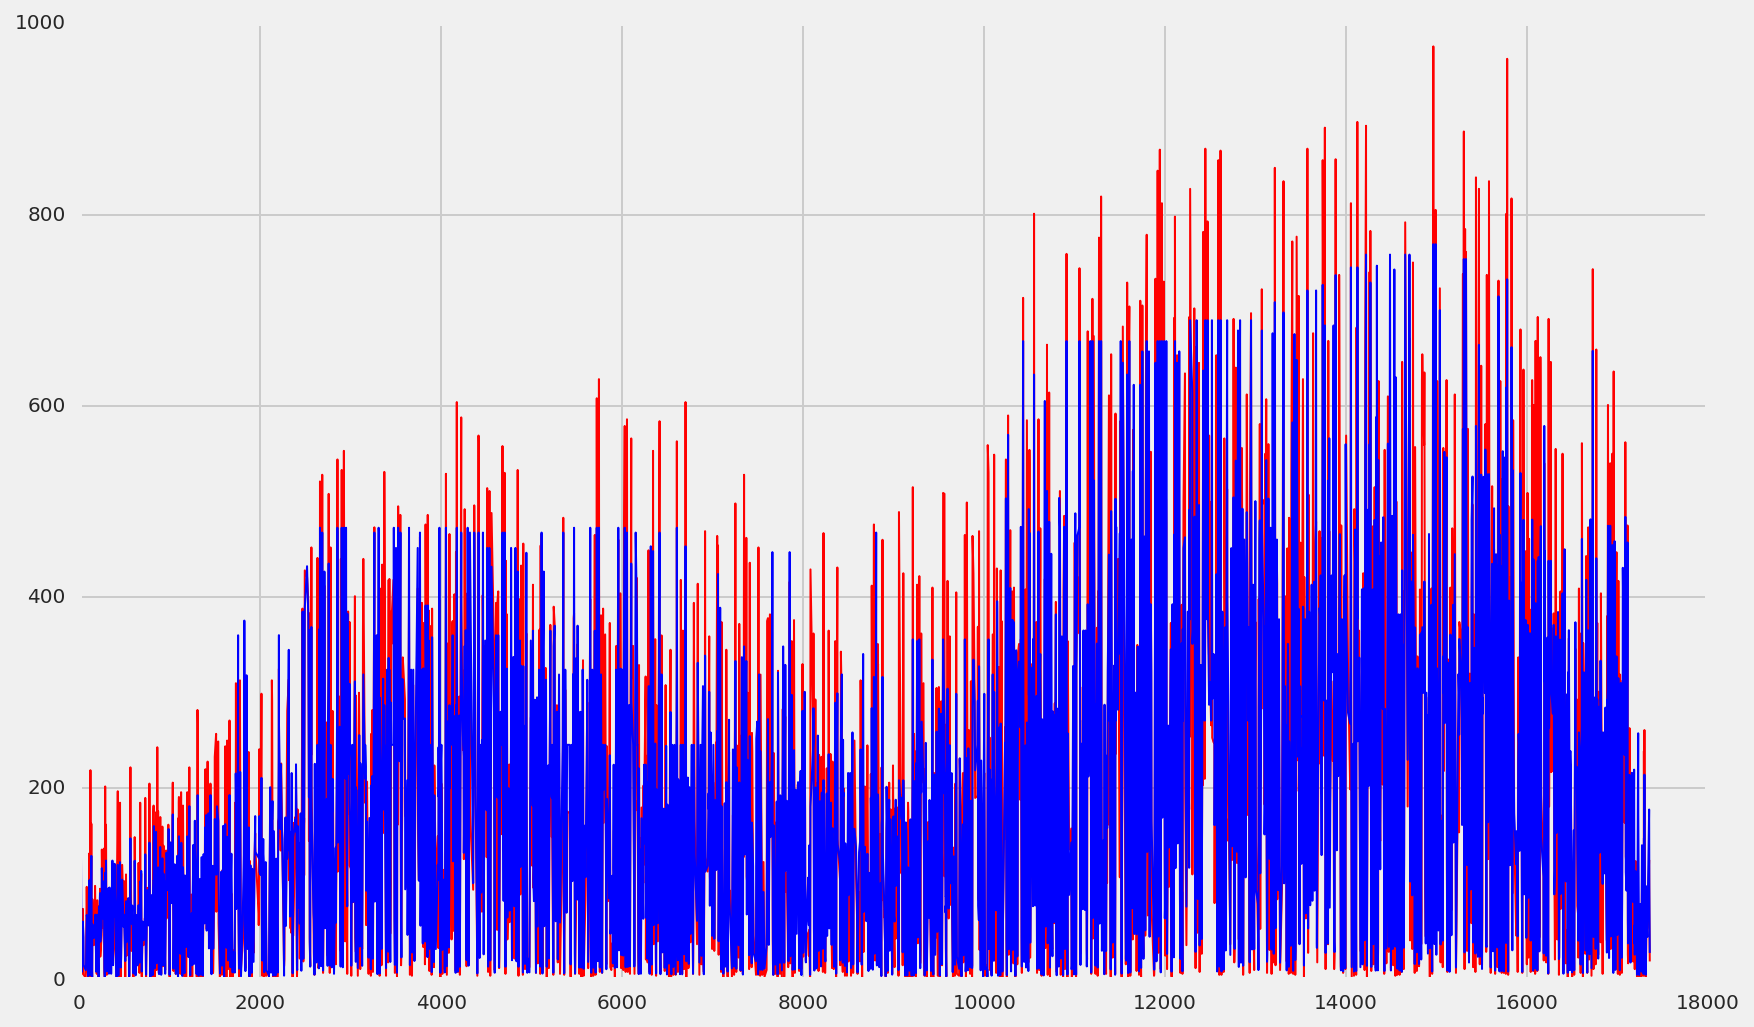

In [30]:
plt.plot(comparison['Real Values'], color = 'red', label = 'Real Values', linewidth = 1)
plt.plot(comparison['Predictions'], color = 'blue', label = 'Predictions', linewidth = 1)
plt.show()